<a href="https://colab.research.google.com/github/BLANKatGITHUB/ibmproject/blob/main/music_and_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error # Import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [ ]:

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/music and mental health.csv")

# Drop the timestamp and permissions columns
df = df.drop(["Timestamp", "Permissions"], axis=1)

# Define the target variable as a binary variable indicating whether the respondent has any mental health condition
df["Mental health"] = df[["Anxiety", "Depression", "Insomnia", "OCD"]].any(axis=1).astype(int)

In [ ]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Mental health
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,1
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,1
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,1
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,1
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,1




## ***VISUALIZATION***

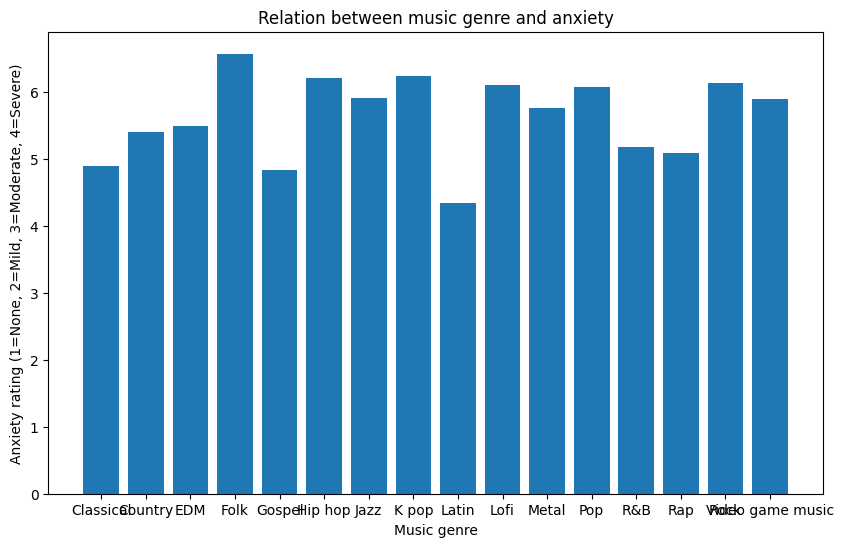

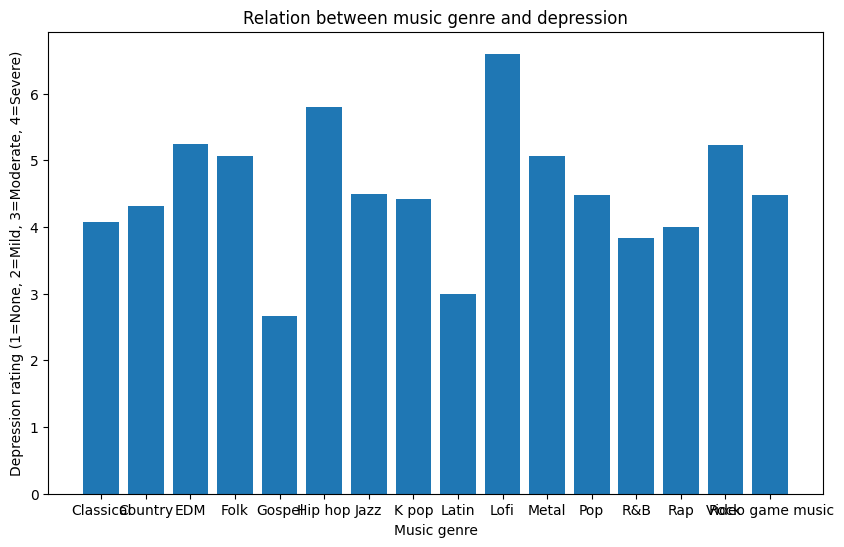

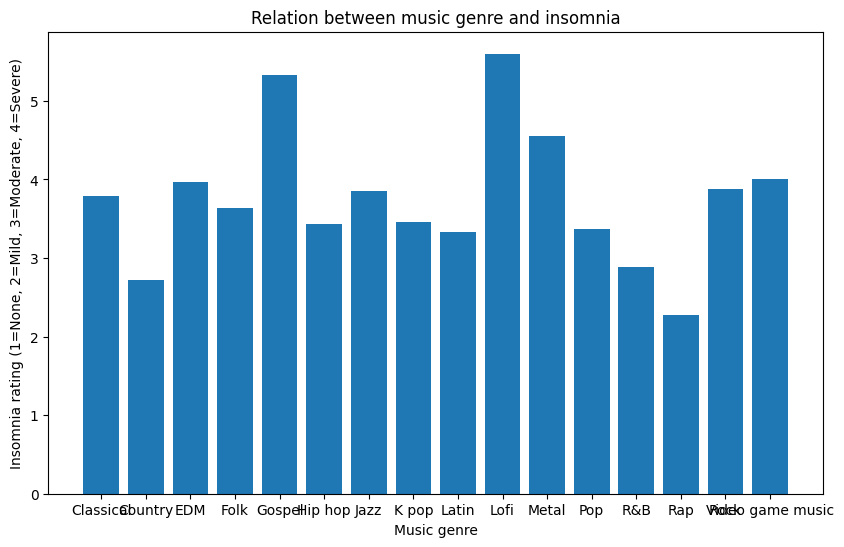

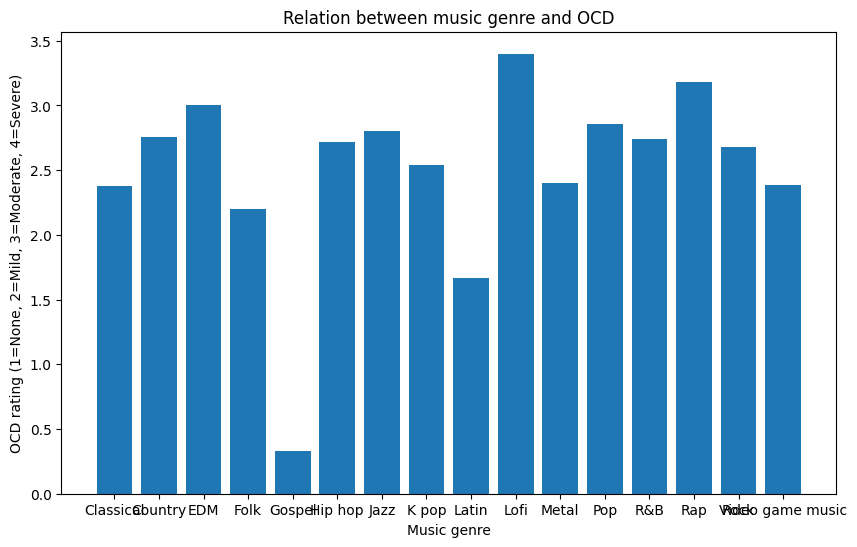

In [ ]:
# Plot a bar chart of the ratings of anxiety by music genre
plt.figure(figsize=(10,6))
plt.bar(df.groupby("Fav genre")["Anxiety"].mean().index,
        df.groupby("Fav genre")["Anxiety"].mean().values)
plt.xlabel("Music genre")
plt.ylabel("Anxiety rating (1=None, 2=Mild, 3=Moderate, 4=Severe)")
plt.title("Relation between music genre and anxiety")
plt.show()

# Plot a bar chart of the ratings of depression by music genre
plt.figure(figsize=(10,6))
plt.bar(df.groupby("Fav genre")["Depression"].mean().index,
        df.groupby("Fav genre")["Depression"].mean().values)
plt.xlabel("Music genre")
plt.ylabel("Depression rating (1=None, 2=Mild, 3=Moderate, 4=Severe)")
plt.title("Relation between music genre and depression")
plt.show()

# Plot a bar chart of the ratings of insomnia by music genre
plt.figure(figsize=(10,6))
plt.bar(df.groupby("Fav genre")["Insomnia"].mean().index,
        df.groupby("Fav genre")["Insomnia"].mean().values)
plt.xlabel("Music genre")
plt.ylabel("Insomnia rating (1=None, 2=Mild, 3=Moderate, 4=Severe)")
plt.title("Relation between music genre and insomnia")
plt.show()

# Plot a bar chart of the ratings of OCD by music genre
plt.figure(figsize=(10,6))
plt.bar(df.groupby("Fav genre")["OCD"].mean().index,
        df.groupby("Fav genre")["OCD"].mean().values)
plt.xlabel("Music genre")
plt.ylabel("OCD rating (1=None, 2=Mild, 3=Moderate, 4=Severe)")
plt.title("Relation between music genre and OCD")
plt.show()


In [ ]:
# Drop the original mental health columns
df = df.drop(["Anxiety", "Depression", "Insomnia", "OCD"], axis=1)

# Split the data into features and target
X = df.drop("Mental health", axis=1)
y = df["Mental health"]

# Define a one-hot encoder object
encoder = OneHotEncoder(handle_unknown="ignore")

# Fit and transform the features with the encoder
X_enc = encoder.fit_transform(X)

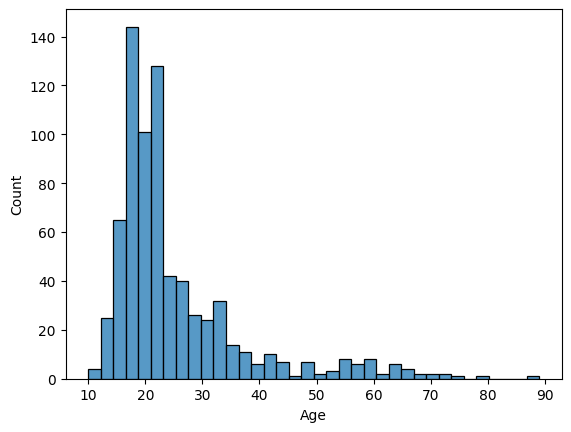

In [ ]:
# Create a histogram of the age feature
sns.histplot(X["Age"])
plt.show()


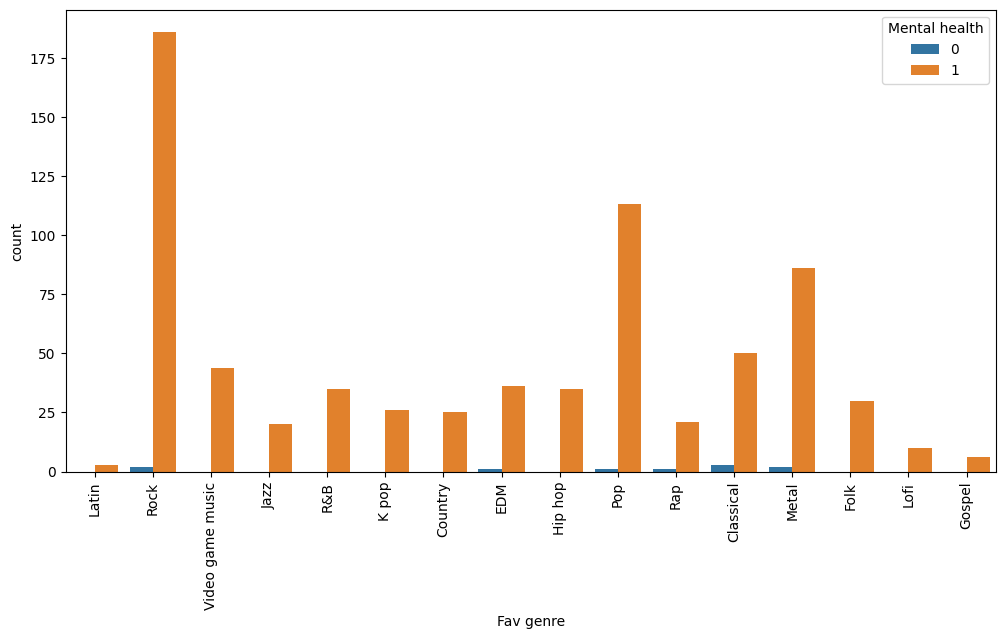

In [ ]:
# Select the columns of interest
cols = ["Fav genre", "Mental health"]

# Subset the dataframe with the selected columns
df = df[cols]

# Create a figure with a larger size
plt.figure(figsize=(12, 6))

# Create a countplot of the favorite genre by the mental health target
sns.countplot(data=df, x="Fav genre", hue="Mental health")

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Training


In [ ]:
# Apply SMOTE on the encoded features and target to create balanced data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_enc, y)
# Print the value counts of the resampled target
print(y_res.value_counts())
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Define a random forest classifier with the best parameters from grid search
model = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=5, random_state=42)
# Fit the model on the train set
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

1    726
0    726
Name: Mental health, dtype: int64


# Evaluation


In [ ]:
# Evaluate the model performance
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE", (np.sqrt(mean_squared_error(y_test, y_pred))))

Accuracy: 0.9965635738831615
Confusion matrix:
 [[143   0]
 [  1 147]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.99      1.00       148

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291

MSE: 0.003436426116838488
RMSE 0.058621038176054914
